In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from utils import *
from dataset import *
from data_module import *

In [3]:
plt.rcParams['figure.figsize'] = (14,10)
font = {'family' : 'DejaVu Sans',  'weight' : 'normal',  'size'  : 22}
plt.rc('font', **font)

In [4]:
df = pd.read_csv('dataset_strat.csv')

In [5]:
df

,filename,width,height,class,bboxes,total_bolts,fold
0,C:\Users\hwb20103\Github\AFRC_CRAD_1718_COREF\...,4032,3024,Bolt,"[[366, 324, 566, 524], [2527, 324, 2727, 524],...",11,0
1,C:\Users\hwb20103\Github\AFRC_CRAD_1718_COREF\...,4032,3024,Bolt,"[[371, 334, 576, 529], [381, 1018, 581, 1212],...",11,0
2,C:\Users\hwb20103\Github\AFRC_CRAD_1718_COREF\...,4032,3024,Bolt,"[[366, 324, 561, 524], [361, 1013, 561, 1212],...",11,0
3,C:\Users\hwb20103\Github\AFRC_CRAD_1718_COREF\...,4032,3024,Bolt,"[[366, 324, 566, 519], [366, 1023, 566, 1222],...",11,0
4,C:\Users\hwb20103\Github\AFRC_CRAD_1718_COREF\...,4032,3024,Bolt,"[[1434, 344, 1629, 544], [2492, 344, 2697, 549...",11,1
...,...,...,...,...,...,...,...
174,C:\Users\hwb20103\Github\AFRC_CRAD_1718_COREF\...,1512,2016,Bolt,"[[904, 1763, 1007, 1862], [195, 126, 298, 222]...",9,3
175,C:\Users\hwb20103\Github\AFRC_CRAD_1718_COREF\...,4032,3024,Bolt,"[[3625, 954, 3825, 1153], [1205, 2251, 1404, 2...",9,4
176,C:\Users\hwb20103\Github\AFRC_CRAD_1718_COREF\...,4032,3024,Bolt,"[[965, 2366, 1160, 2571], [2861, 545, 3056, 74...",9,4
177,C:\Users\hwb20103\Github\AFRC_CRAD_1718_COREF\...,4032,3024,Bolt,"[[3211, 135, 3405, 335], [3350, 769, 3550, 964...",9,4


In [6]:
df["bboxes"] = df["bboxes"].apply(eval)

In [7]:
test_dataset = BoltDataset(df, get_valid_transforms(), 'train')

In [8]:
test_dataset[0]

(tensor([[[1.5810, 1.5982, 1.6153,  ..., 1.4098, 1.3070, 1.2899],
          [1.5810, 1.5982, 1.5810,  ..., 1.4612, 1.4098, 1.3242],
          [1.5810, 1.5982, 1.5810,  ..., 1.3242, 1.3413, 1.3584],
          ...,
          [1.7694, 1.7694, 1.7694,  ..., 1.6667, 1.6495, 1.6495],
          [1.7865, 1.7352, 1.7523,  ..., 1.6495, 1.6495, 1.6838],
          [1.7523, 1.7694, 1.7523,  ..., 1.6495, 1.6495, 1.6495]],
 
         [[1.7983, 1.8508, 1.8158,  ..., 1.6583, 1.6057, 1.5882],
          [1.7808, 1.8158, 1.8158,  ..., 1.6758, 1.6758, 1.6408],
          [1.8333, 1.8158, 1.8158,  ..., 1.6408, 1.6583, 1.6057],
          ...,
          [2.0259, 2.0259, 1.9909,  ..., 1.9034, 1.8859, 1.8508],
          [2.0259, 2.0084, 2.0084,  ..., 1.9034, 1.9209, 1.9034],
          [2.0084, 2.0259, 2.0084,  ..., 1.9384, 1.8859, 1.8683]],
 
         [[2.0997, 2.1171, 2.1520,  ..., 1.9777, 1.9080, 1.8731],
          [2.1346, 2.0997, 2.1346,  ..., 1.9951, 1.9080, 1.8905],
          [2.0648, 2.0997, 2.1346,  ...,

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 1024, 1024])


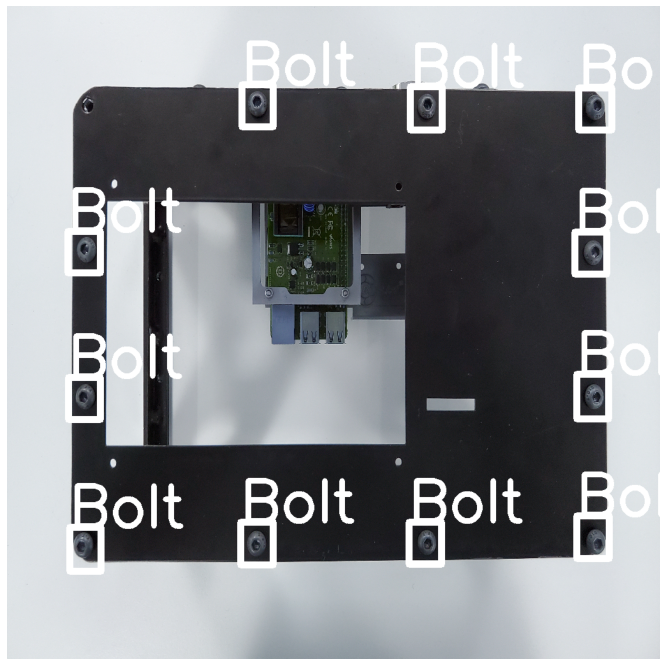

In [9]:
test_dataset.show_data(5)

In [10]:
bolt_module = BoltDataModule(df,
                             get_train_transforms(target_img_size=512),
                             get_valid_transforms(target_img_size=512),
                             num_workers=16,
                             bs=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 512, 512])


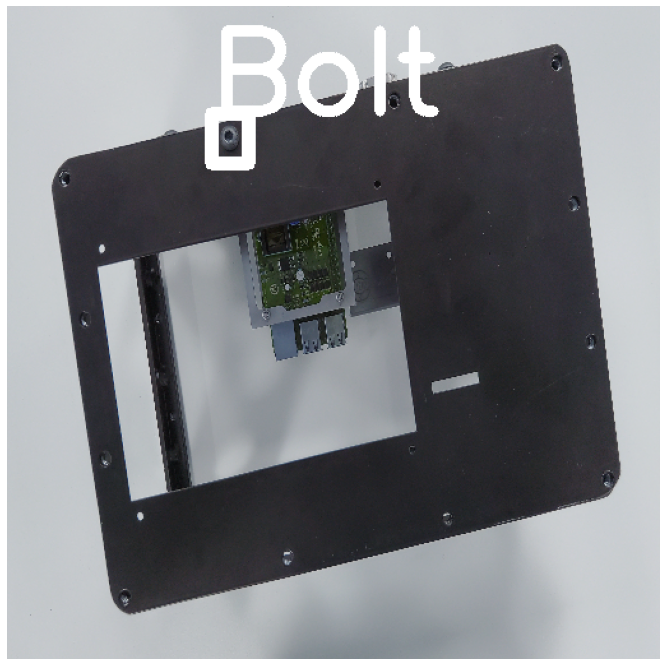

In [11]:
bolt_module.train_dataset().show_data(13)

In [12]:
loader = bolt_module.train_dataloader()

C:\Users\hwb20103\Anaconda3\envs\deep\lib\site-packages\torch\utils\data\dataloader.py:478: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 12 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [13]:
len(loader)

54

In [14]:
images, annotations, targets, bolts = next(iter(loader))

In [15]:
targets

({'bboxes': tensor([[414.1376,  57.9048, 448.6772,  82.6667],
          [412.4445, 316.4445, 446.9841, 341.2064],
          [409.9048, 443.8095, 443.5979, 469.2064],
          [302.5609, 440.6349, 337.1005, 466.0317],
          [193.5238, 443.1746, 226.5397, 468.5714],
          [ 80.2540, 316.4445, 114.1164, 341.8413],
          [ 81.1005, 184.0000, 114.1164, 208.7619],
          [ 79.4074,  54.7302, 113.2698,  80.1270],
          [306.7936,  57.9048, 340.4868,  83.3016]]),
  'labels': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1]),
  'bolts': 9,
  'img_size': (512, 512),
  'img_scale': tensor([1.])},
 {'bboxes': tensor([[ 25.3968, 189.9682,  50.5397, 222.4762],
          [ 26.1587, 311.5344,  52.3175, 345.3968],
          [168.8889,  69.4180, 194.2857, 103.2804],
          [306.5397, 423.2804, 331.9365, 454.7725],
          [441.9048, 189.9682, 466.2857, 221.4603],
          [441.1429, 304.7619, 466.2857, 339.6402]]),
  'labels': tensor([1, 1, 1, 1, 1, 1]),
  'bolts': 6,
  'img_size': (512, 512